In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.8.2


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [19]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [20]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(units=11,activation='relu'))

In [26]:
classifier.add(Dense(units=6,activation='relu'))

In [27]:
classifier.add(Dense(units=1,activation='relu'))

In [28]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=25)

Epoch 1/25
536/536 [==============================] - 3s 3ms/step - loss: 2.7291 - accuracy: 0.6776 - val_loss: 2.2771 - val_accuracy: 0.7793
Epoch 2/25
536/536 [==============================] - 1s 2ms/step - loss: 1.8950 - accuracy: 0.7608 - val_loss: 1.6016 - val_accuracy: 0.7376
Epoch 3/25
536/536 [==============================] - 2s 3ms/step - loss: 1.3156 - accuracy: 0.7442 - val_loss: 1.0856 - val_accuracy: 0.7660
Epoch 4/25
536/536 [==============================] - 1s 2ms/step - loss: 0.9645 - accuracy: 0.7738 - val_loss: 0.8915 - val_accuracy: 0.7762
Epoch 5/25
536/536 [==============================] - 1s 2ms/step - loss: 0.7893 - accuracy: 0.7832 - val_loss: 0.6847 - val_accuracy: 0.7808
Epoch 6/25
536/536 [==============================] - 2s 3ms/step - loss: 0.6551 - accuracy: 0.7966 - val_loss: 0.5869 - val_accuracy: 0.7948
Epoch 7/25
536/536 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.8099 - val_loss: 0.5456 - val_accuracy: 0.7793
Epoch 

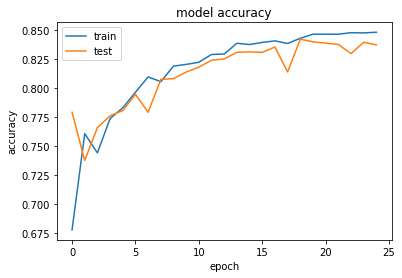

In [30]:
 import matplotlib.pyplot  as  plt
 
 #summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

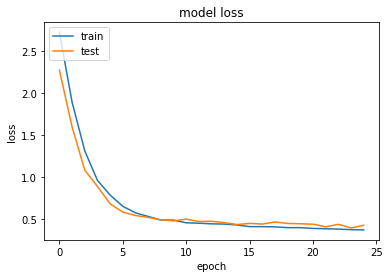

In [31]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1553,   42],
       [ 255,  150]])

In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8515